In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("train.csv")

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df.shape

(404290, 6)

In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [12]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
new_df = df.sample(30000)

In [30]:
#added extra features
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [31]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
324978,324978,451152,451153,How was your first home purchase experience?,What was your first home experience?,0,44,36,7,6
209971,209971,314406,314407,What is the answer of below riddle? and why?,What's the answer for this riddle?,0,44,34,9,6
165023,165023,42172,256327,What are some modern examples of social injust...,What factors contribute to social injustice?,0,50,44,8,6
68845,68845,118898,118899,"What are some symbols for renewal, rebirth, or...",Why was the Renaissance viewed as a rebirth?,0,58,44,9,8
231422,231422,341226,341227,"What is the meaning of the word ""queasy""?",What happens when you lack a chromosome?,0,41,40,8,7


In [32]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [40]:
%matplotlib inline

minimum characters 2
maximum characters 623
average num of characters 59


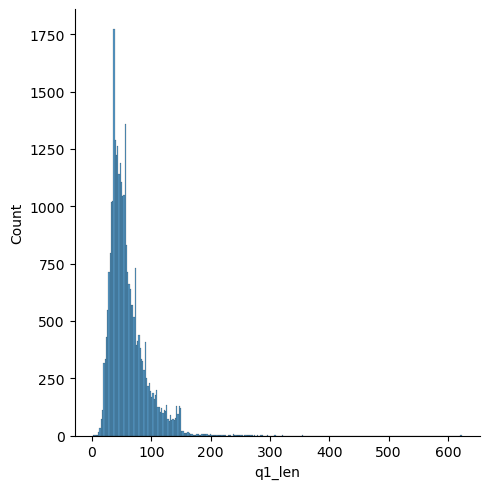

In [39]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 1169
average num of characters 60


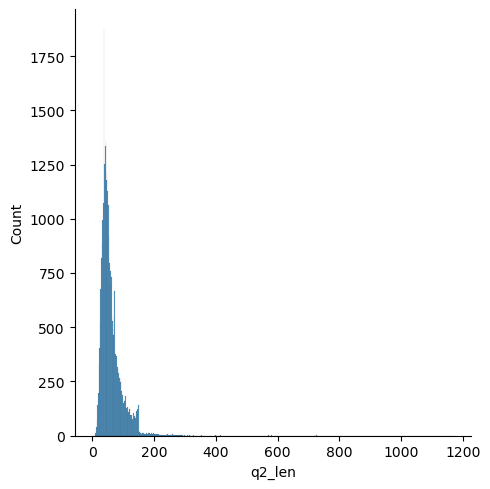

In [42]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

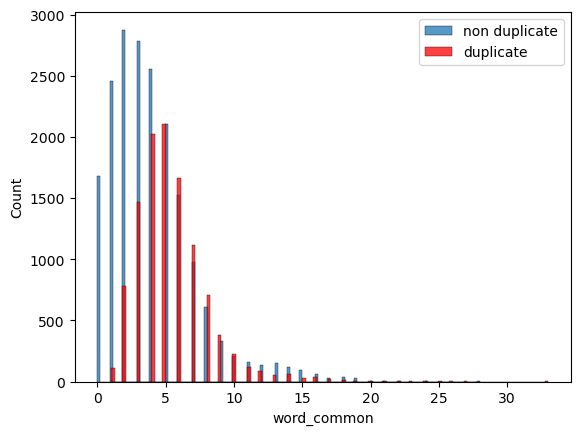

In [52]:

sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate',color='red')
plt.legend()
plt.show()

In [55]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 6)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
324978,0,44,36,7,6,5
209971,0,44,34,9,6,3
165023,0,50,44,8,6,3
68845,0,58,44,9,8,0
231422,0,41,40,8,7,1


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6888333333333333

In [62]:
!pip install xgboost

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7001666666666667